In [65]:
import numpy as np
import pandas as pd

In [66]:
# https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm

In [67]:
# Download Dataset from https://www.dropbox.com/scl/fi/bkcdp9tpqqh6dfr6phtt8/AnnArbor.xlsx?rlkey=0agfqwc7f0kt7oqb3e2h6q3qs&dl=1
# and add it to colab

In [68]:
# annArborDf = pd.read_excel("./AnnArbor.xlsx")
annArborDf = pd.read_excel("https://www.dropbox.com/scl/fi/bkcdp9tpqqh6dfr6phtt8/AnnArbor.xlsx?rlkey=0agfqwc7f0kt7oqb3e2h6q3qs&dl=1")

In [69]:
annArborDf

,Rent,Beds,Baths,Sqft
0,645,1,1.0,500
1,675,1,1.0,648
2,760,1,1.0,700
3,800,1,1.0,903
4,820,1,1.0,817
5,850,2,1.0,920
6,855,1,1.0,900
7,859,1,1.0,886
8,900,1,1.5,1000
9,905,2,1.0,920


In [70]:
annArborDf.size

160

In [71]:
annArborDf.describe()

,Rent,Beds,Baths,Sqft
count,40.000000,40.000000,40.000000,40.000000
mean,1222.925000,2.200000,1.750000,1286.025000
std,424.804413,0.911465,0.816497,645.813678
min,645.000000,1.000000,1.000000,500.000000
25%,905.000000,2.000000,1.000000,920.000000
50%,1067.000000,2.000000,1.750000,1163.500000
75%,1504.500000,3.000000,2.000000,1403.000000
max,2400.000000,5.000000,4.000000,4319.000000


In [72]:
annArborDf.shape

(40, 4)

In [73]:
import matplotlib.pyplot as plt

In [74]:
# Plotting
fig1 = plt.figure(
  figsize=(8, 8)
)

<Figure size 800x800 with 0 Axes>

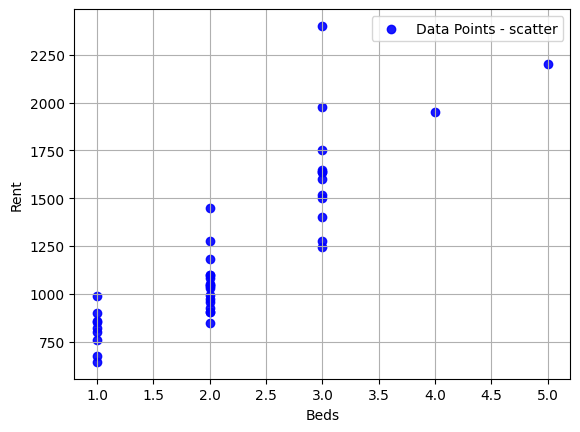

In [75]:
plt.scatter(
  annArborDf["Beds"],
  annArborDf["Rent"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.xlabel('Beds')
plt.ylabel('Rent')
plt.legend()
plt.grid(True)



plt.show()

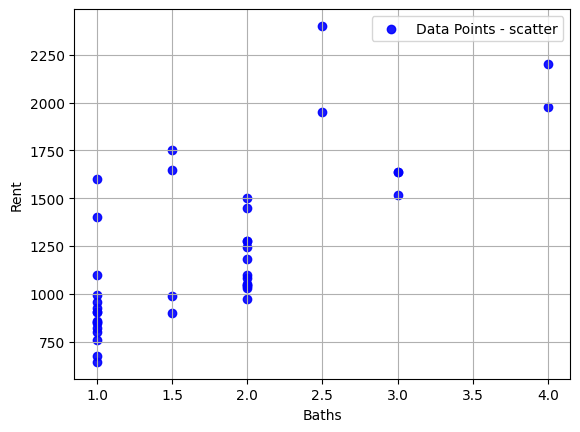

In [76]:
plt.scatter(
  annArborDf["Baths"],
  annArborDf["Rent"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.xlabel('Baths')
plt.ylabel('Rent')
plt.legend()
plt.grid(True)



plt.show()

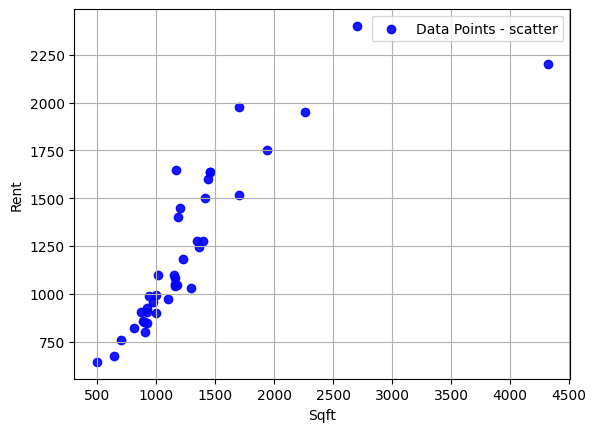

In [77]:
plt.scatter(
  annArborDf["Sqft"],
  annArborDf["Rent"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.xlabel('Sqft')
plt.ylabel('Rent')
plt.legend()
plt.grid(True)



plt.show()

In [78]:
rentSqftModel1 = sm.OLS(
  annArborDf["Rent"],
  sm.add_constant(annArborDf[["Sqft"]])
)
rentSqftModel1Fit = rentSqftModel1.fit()
print(rentSqftModel1Fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     90.53
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           1.34e-11
Time:                        01:45:48   Log-Likelihood:                -273.94
No. Observations:                  40   AIC:                             551.9
Df Residuals:                      38   BIC:                             555.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        512.9794     83.285      6.159      0.0

In [79]:
from functions.exportModel import exportModel
exportModel({
    "modelName": "rentSqftModel1Fit",
    "model": rentSqftModel1Fit,
    "description": "Predict Rent based on Sqft for annArborDf",
    "modelType": "sm.OLS",
    "baseRelativePath": "..",
    "inputs": [
        {
            "name": "const",
            "type": "int"
        },
        {
            "name": "Sqft",
            "type": "float"
        }
    ],
    "output": {
        "name": "Rent",
        "type": "float"
    }
})

In [80]:
predictedRent1 = rentSqftModel1Fit.predict(sm.add_constant(annArborDf["Sqft"]))
annArborDf['predictedRent1'] = predictedRent1
annArborDf

,Rent,Beds,Baths,Sqft,predictedRent1
0,645,1,1.0,500,789.002674
1,675,1,1.0,648,870.705551
2,760,1,1.0,700,899.411968
3,800,1,1.0,903,1011.477401
4,820,1,1.0,817,964.001405
5,850,2,1.0,920,1020.862191
6,855,1,1.0,900,1009.821262
7,859,1,1.0,886,1002.092611
8,900,1,1.5,1000,1065.025909
9,905,2,1.0,920,1020.862191


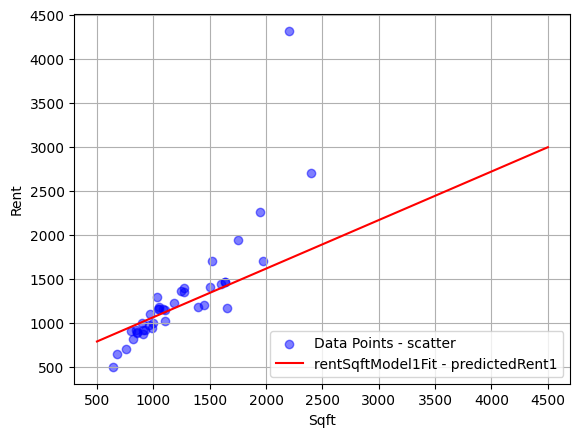

In [81]:
plt.scatter(
  annArborDf["Rent"],
  annArborDf["Sqft"],
  color='blue',
  alpha=0.5,
  label='Data Points - scatter',
)

intercept = rentSqftModel1Fit.params['const']
sqFtSlope = rentSqftModel1Fit.params['Sqft']
x_values = np.linspace(500, 4500, 200)
y_values = intercept + sqFtSlope * x_values

plt.plot(
  x_values,
  y_values,
  color='red',
  label='rentSqftModel1Fit - predictedRent1'
)
plt.xlabel('Sqft')
plt.ylabel('Rent')
plt.legend()
plt.grid(True)


plt.show()

In [82]:
rentBedsBathsSqftModel = sm.OLS(
  annArborDf["Rent"],
  sm.add_constant(annArborDf[["Beds", "Baths", "Sqft"]])
)
rentBedsBathsSqftModelFit = rentBedsBathsSqftModel.fit()
print(rentBedsBathsSqftModelFit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     50.88
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           4.99e-13
Time:                        01:45:49   Log-Likelihood:                -265.19
No. Observations:                  40   AIC:                             538.4
Df Residuals:                      36   BIC:                             545.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        300.4116     84.011      3.576      0.0

In [83]:
from functions.exportModel import exportModel
exportModel({
    "modelName": "rentBedsBathsSqftModelFit",
    "model": rentBedsBathsSqftModelFit,
    "description": "Predict Rent based on Beds,Baths,Sqft for annArborDf",
    "modelType": "sm.OLS",
    "baseRelativePath": "..",
    "inputs": [
        {
            "name": "const",
            "type": "int"
        },
        {
            "name": "Beds",
            "type": "int"
        },
        {
            "name": "Baths",
            "type": "int"
        },
        {
            "name": "Sqft",
            "type": "float"
        }
       
    ],
    "output": {
        "name": "Rent",
        "type": "float"
    }
})

In [84]:
import math

In [85]:
from functions.transformers import transformersDict
# annArborDf['log(Sqft)'] = annArborDf.apply(lambda row: math.log(row['Sqft']), axis=1)
annArborDf['log(Sqft)'] = annArborDf.apply(transformersDict.get('Sqft_log'), axis=1)
annArborDf

,Rent,Beds,Baths,Sqft,predictedRent1,log(Sqft)
0,645,1,1.0,500,789.002674,6.214608
1,675,1,1.0,648,870.705551,6.473891
2,760,1,1.0,700,899.411968,6.551080
3,800,1,1.0,903,1011.477401,6.805723
4,820,1,1.0,817,964.001405,6.705639
5,850,2,1.0,920,1020.862191,6.824374
6,855,1,1.0,900,1009.821262,6.802395
7,859,1,1.0,886,1002.092611,6.786717
8,900,1,1.5,1000,1065.025909,6.907755
9,905,2,1.0,920,1020.862191,6.824374


In [86]:
rentBedsBathsLogSqftModel= sm.OLS(
  annArborDf["Rent"],
  sm.add_constant(annArborDf[["Beds", "Baths", "log(Sqft)"]])
)
rentBedsBathsLogSqftModelFit = rentBedsBathsLogSqftModel.fit()
print(rentBedsBathsLogSqftModelFit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     67.05
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           8.29e-15
Time:                        01:45:49   Log-Likelihood:                -260.61
No. Observations:                  40   AIC:                             529.2
Df Residuals:                      36   BIC:                             536.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3909.7415   1053.792     -3.710      0.0

In [87]:
from functions.exportModel import exportModel
exportModel({
    "modelName": "rentBedsBathsLogSqftModelFit",
    "model": rentBedsBathsLogSqftModelFit,
    "description": "Predict Rent based on Beds,Baths,log(Sqft) for annArborDf",
    "modelType": "sm.OLS",
    "baseRelativePath": "..",
    "inputs": [
        {
            "name": "const",
            "type": "int"
        },
        {
            "name": "Beds",
            "type": "int"
        },
        {
            "name": "Baths",
            "type": "int"
        },
        {
            "name": "Sqft",
            "type": "float"
        }
       
    ],
    "transformers":[
        {
            "name": "log(Sqft)",
            "transformer": "Sqft_log"
        }
    ],
    "output": {
        "name": "Rent",
        "type": "float"
    }
})

In [88]:
annArborDf['log(Rent)'] = annArborDf.apply(lambda row: math.log(row['Rent']), axis=1)

In [89]:
rentSqftModel4 = sm.OLS(
  annArborDf["log(Rent)"],
  sm.add_constant(annArborDf[["Beds", "Baths", "Sqft"]])
)
rentSqftModel4Fit = rentSqftModel4.fit()
print(rentSqftModel4Fit.summary())

                            OLS Regression Results                            
Dep. Variable:              log(Rent)   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     51.01
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           4.81e-13
Time:                        01:45:49   Log-Likelihood:                 21.804
No. Observations:                  40   AIC:                            -35.61
Df Residuals:                      36   BIC:                            -28.85
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3294      0.064     98.408      0.0

In [93]:
logRentBedsBathsLogSqftModel = sm.OLS(
  annArborDf["log(Rent)"],
  sm.add_constant(annArborDf[["Beds", "Baths", "log(Sqft)"]])
)
logRentBedsBathsLogSqftModelFit = logRentBedsBathsLogSqftModel.fit()
print(logRentBedsBathsLogSqftModelFit.summary())

                            OLS Regression Results                            
Dep. Variable:              log(Rent)   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     74.51
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           1.65e-15
Time:                        01:49:25   Log-Likelihood:                 28.145
No. Observations:                  40   AIC:                            -48.29
Df Residuals:                      36   BIC:                            -41.53
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3808      0.772      4.379      0.0

In [94]:
from functions.exportModel import exportModel
exportModel({
    "modelName": "logRentBedsBathsLogSqftModelFit",
    "model": logRentBedsBathsLogSqftModelFit,
    "description": "Predict log(Rent) based on Beds,Baths,log(Sqft) for annArborDf",
    "modelType": "sm.OLS",
    "baseRelativePath": "..",
    "inputs": [
        {
            "name": "const",
            "type": "int"
        },
        {
            "name": "Beds",
            "type": "int"
        },
        {
            "name": "Baths",
            "type": "int"
        },
        {
            "name": "Sqft",
            "type": "float"
        }
       
    ],
    "transformers":[
        {
            "name": "log(Sqft)",
            "transformer": "Sqft_log"
        }
    ],
    "output": {
        "name": "log(Rent)",
        "type": "float"
    }
})

In [91]:
rentSqftModel6 = sm.OLS(
  annArborDf["log(Rent)"],
  sm.add_constant(annArborDf[["Beds", "log(Sqft)"]])
)
rentSqftModel6Fit = rentSqftModel6.fit()
print(rentSqftModel6Fit.summary())

                            OLS Regression Results                            
Dep. Variable:              log(Rent)   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     113.3
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           1.68e-16
Time:                        01:45:49   Log-Likelihood:                 27.905
No. Observations:                  40   AIC:                            -49.81
Df Residuals:                      37   BIC:                            -44.74
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1352      0.671      4.674      0.0

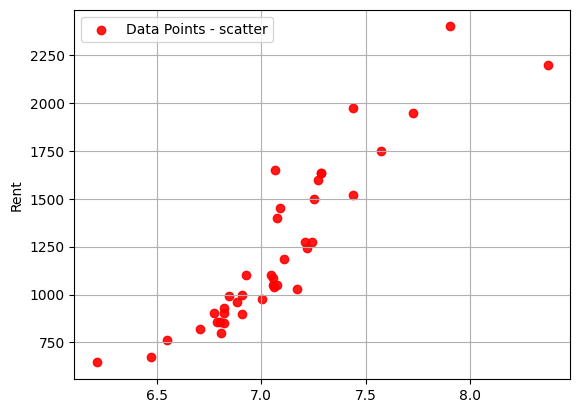

In [92]:
# plt.scatter(
#   annArborDf["Sqft"],
#   annArborDf["Rent"],
#   color='blue',
#   alpha=0.9,
#   label='Data Points - scatter',
# )

plt.scatter(
  annArborDf["log(Sqft)"],
  annArborDf["Rent"],
  color='red',
  alpha=0.9,
  label='Data Points - scatter',
)

# plt.scatter(
#   annArborDf["log(Sqft)"],
#   annArborDf["log(Rent)"],
#   color='Green',
#   alpha=0.9,
#   label='Data Points - scatter',
# )

# plt.scatter(
#   annArborDf["Sqft"],
#   annArborDf["log(Rent)"],
#   color='Yellow',
#   alpha=0.9,
#   label='Data Points - scatter',
# )



# plt.xlabel('Sqft')
plt.ylabel('Rent')
plt.legend()
plt.grid(True)



plt.show()